# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Exploring and Preparing Data


## Objectives


*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


In [15]:
!pip install numpy pandas numpy
!pip install numpy pandas pandas
!pip install numpy pandas seaborn
!pip install requests

In [17]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

import requests
import io


## Exploratory Data Analysis


In [21]:
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
# Fetch the data from the URL
response = requests.get(URL)

# Check if the request was successful
if response.status_code == 200:
    # Load the data into a DataFrame
    df = pd.read_csv(io.StringIO(response.text))
    print(df.head())  # Display the first few rows of the DataFrame
else:
    print("Failed to fetch the file. Status code:", response.status_code)

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


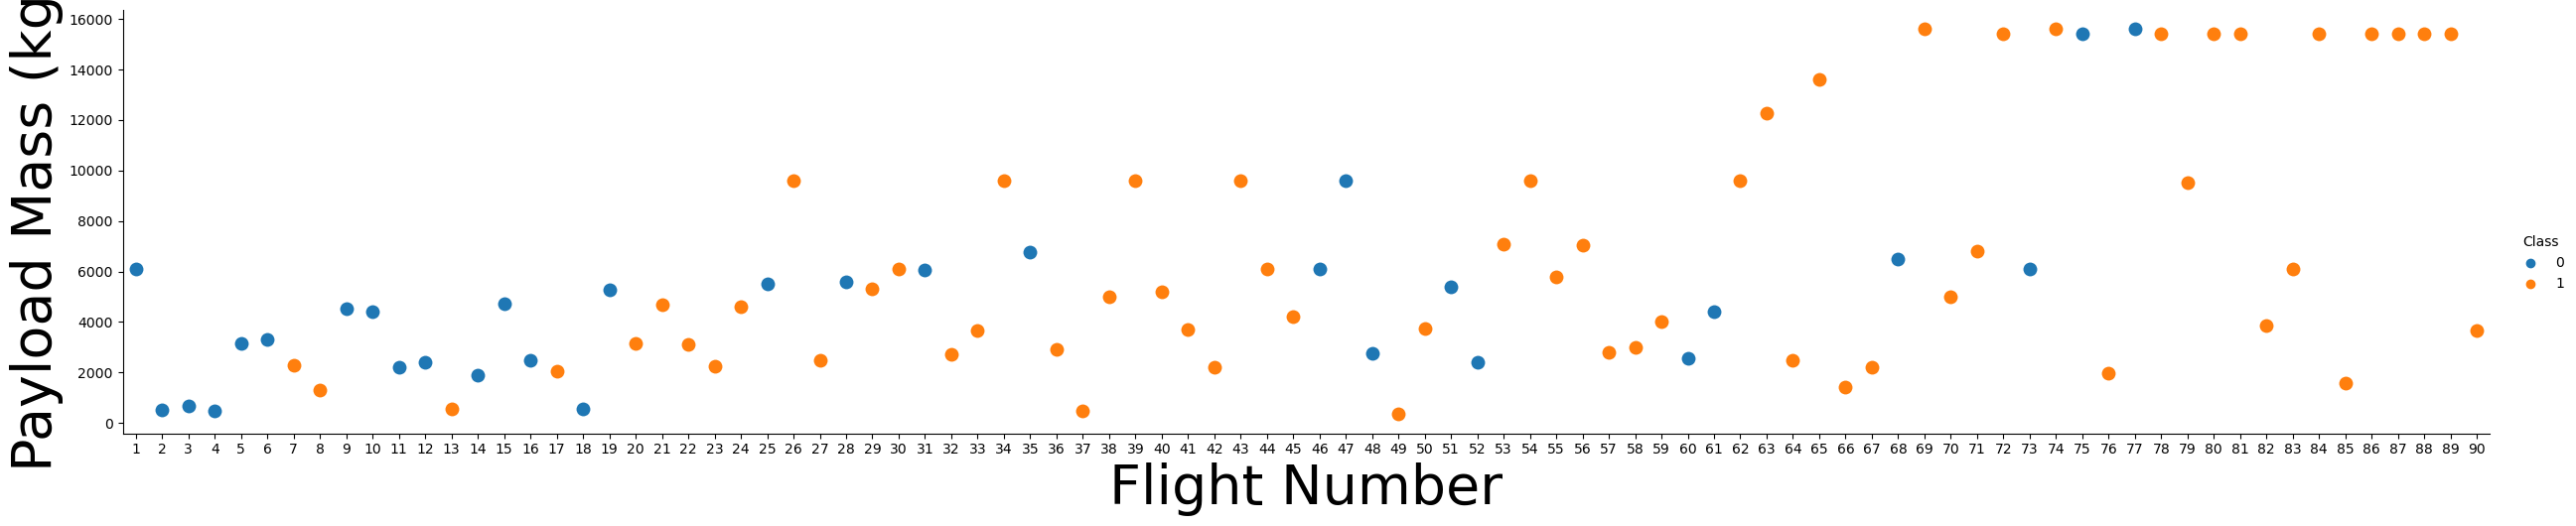

In [30]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect=5, s=100)
plt.xlabel("Flight Number", fontsize=40)
plt.ylabel("Payload Mass (kg)", fontsize=40)
plt.show()

### 1. Visualize the relationship between Flight Number and Launch Site


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


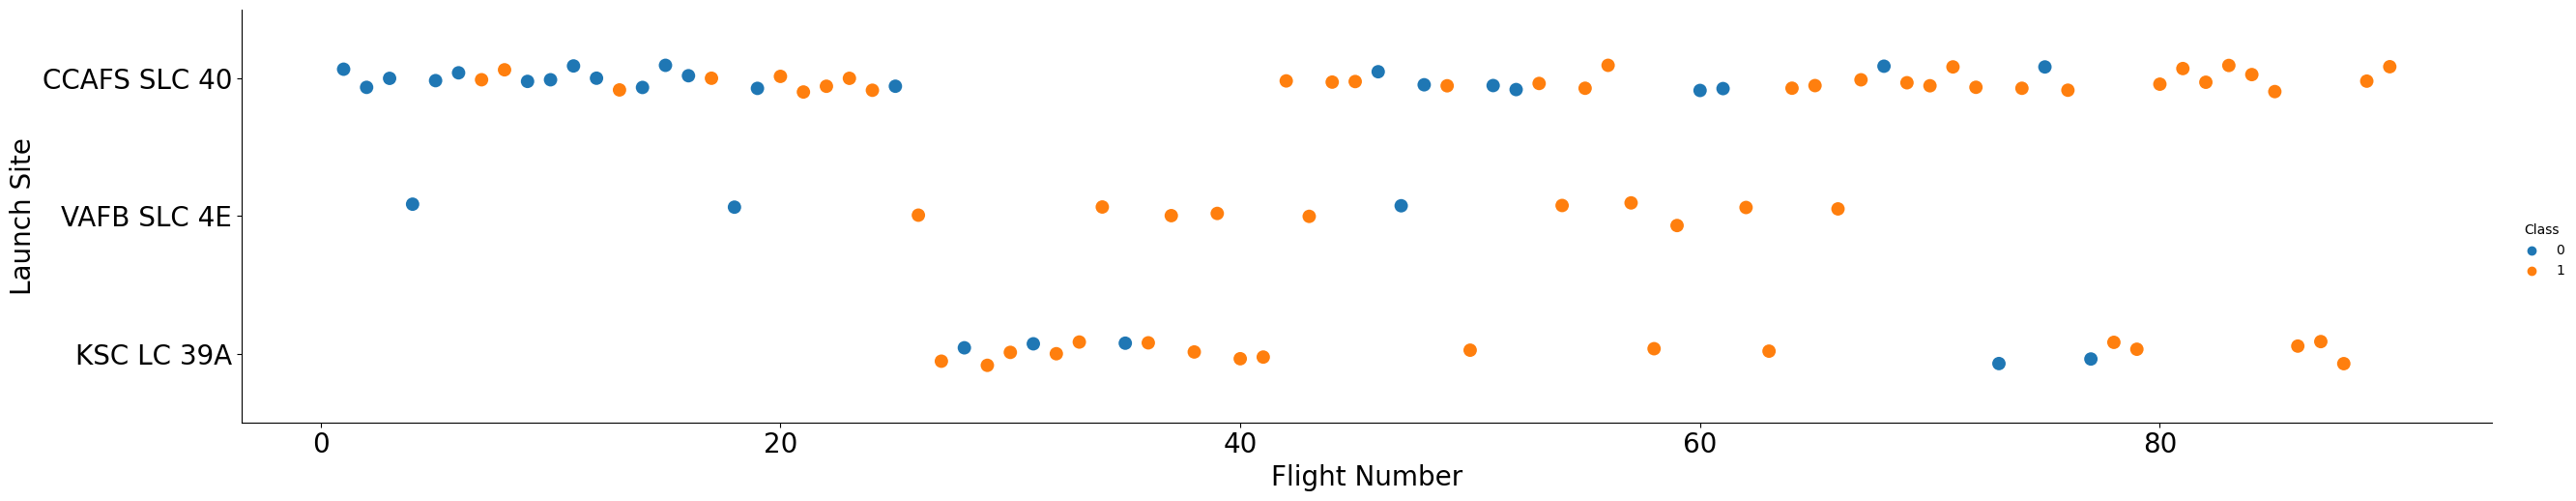

In [34]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value

sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5,size = 10)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

### 2. Visualize the relationship between Payload Mass and Launch Site


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


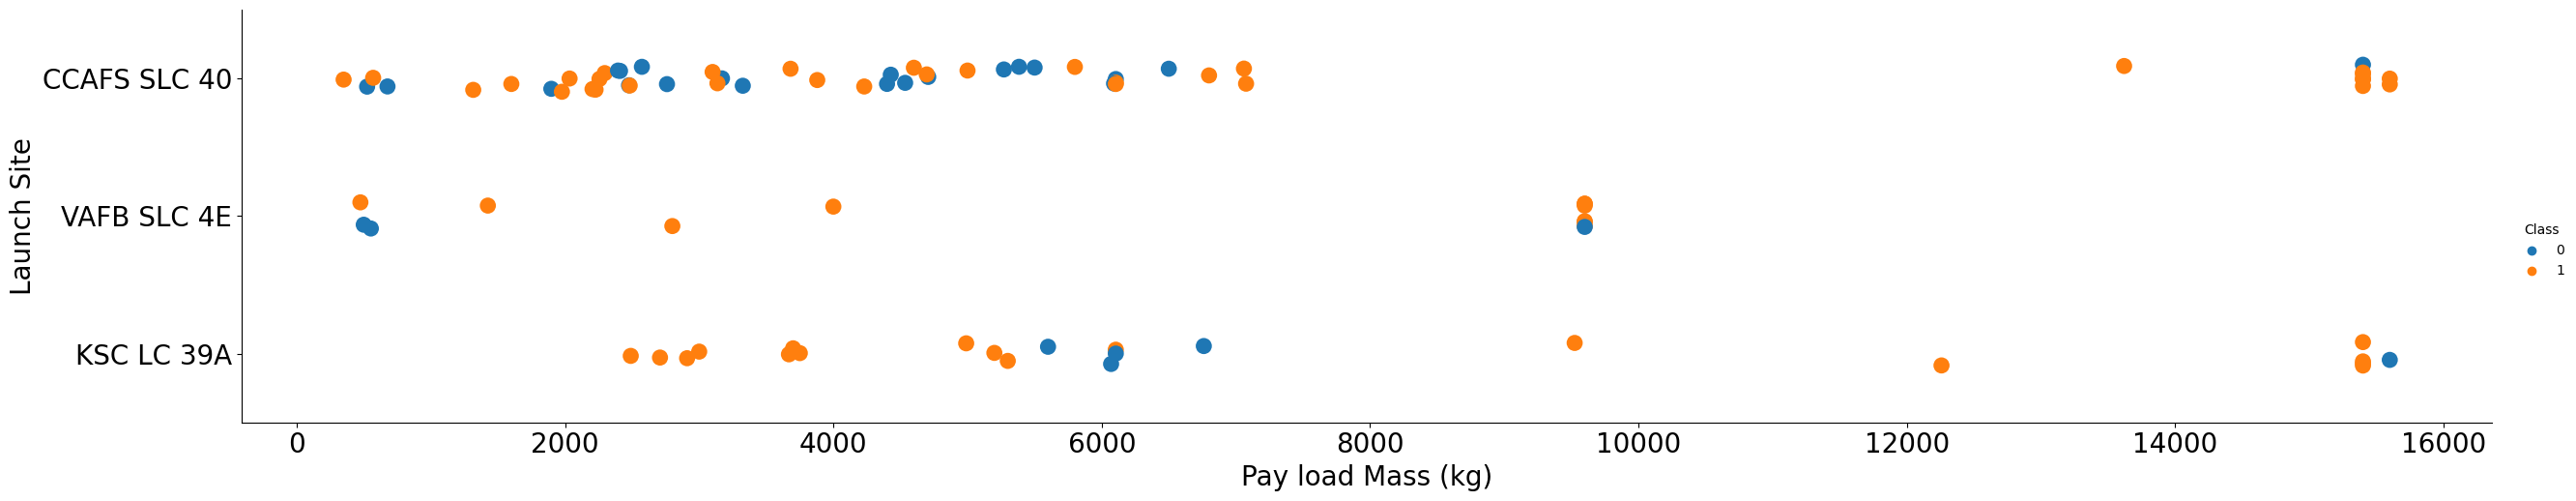

In [47]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5,size= 12)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.show()

### 3. Visualize the relationship between success rate of each orbit type


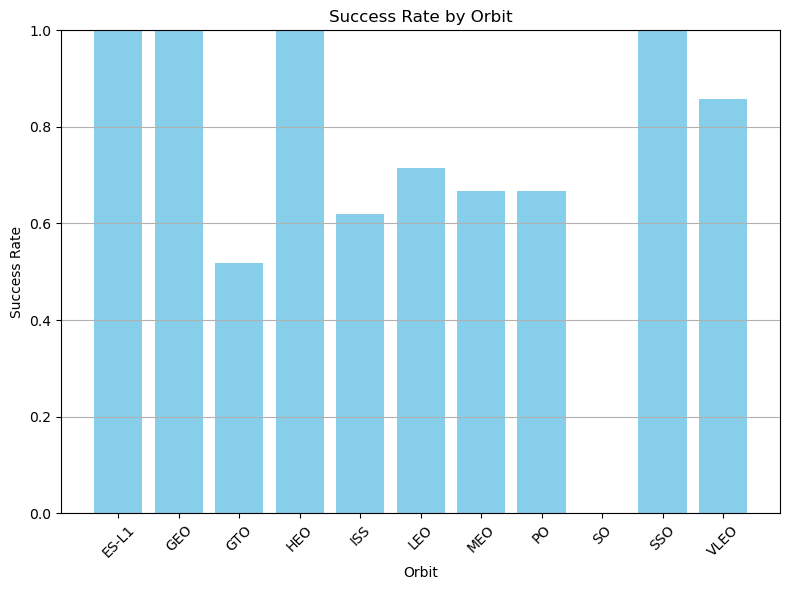

In [50]:
# HINT use groupby method on Orbit column and get the mean of Class column
success_rate = df.groupby('Orbit')['Class'].mean().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(success_rate['Orbit'], success_rate['Class'], color='skyblue')
plt.xlabel('Orbit')
plt.ylabel('Success Rate')
plt.title('Success Rate by Orbit')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Success rate is between 0 and 1
plt.grid(axis='y')

plt.tight_layout()
plt.show()


### 4. Visualize the relationship between FlightNumber and Orbit type

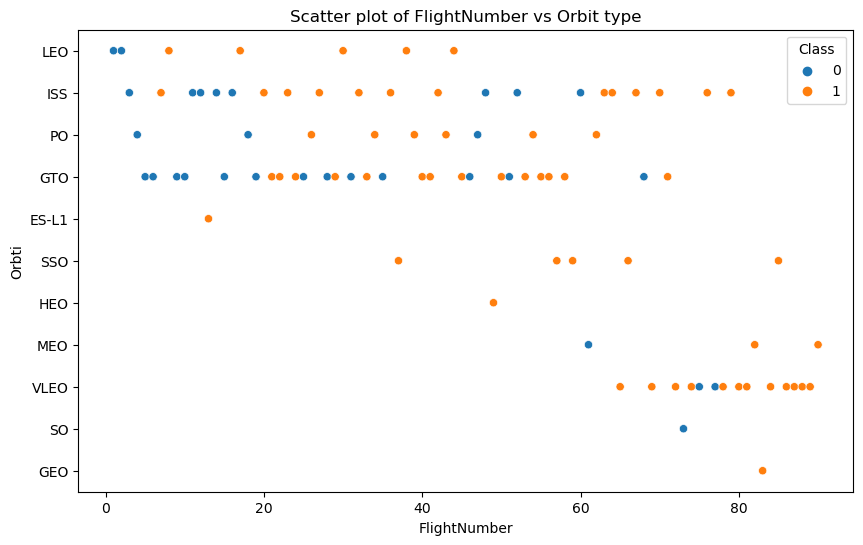

In [53]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the FlightNumber, and hue to be the class value

plt.figure(figsize=(10, 6))
sns.scatterplot(x='FlightNumber', y='Orbit', hue='Class', data=df)

# Setting plot title and labels
plt.title("Scatter plot of FlightNumber vs Orbit type")
plt.xlabel("FlightNumber")
plt.ylabel("Orbti")

# Display the plot
plt.show()


### 5. Visualize the relationship between Payload Mass and Orbit type


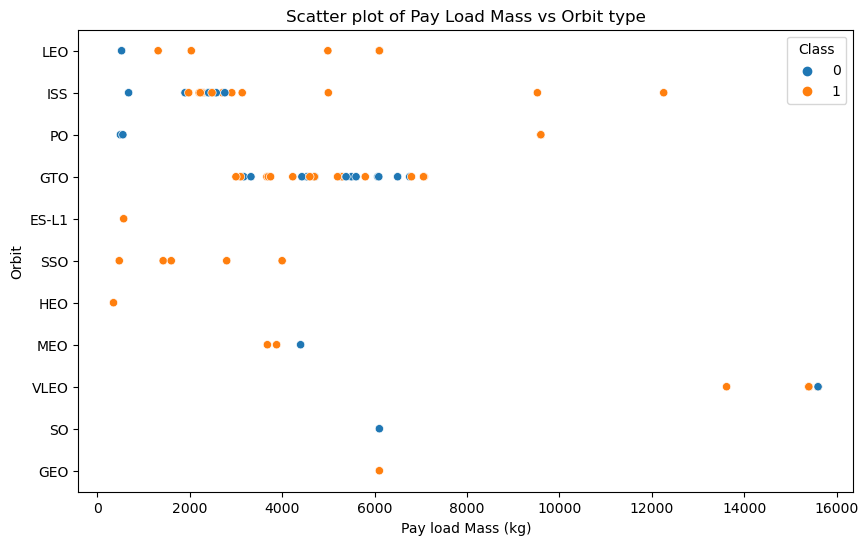

In [56]:
# Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PayloadMass', y='Orbit', hue='Class', data=df)

plt.title("Scatter plot of Pay Load Mass vs Orbit type")
plt.xlabel("Pay load Mass (kg)")
plt.ylabel("Orbit")

# Display the plot
plt.show()


### 6. Visualize the launch success yearly trend


In [61]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


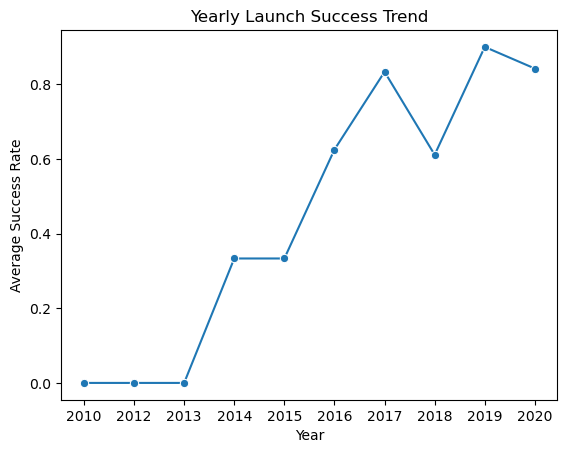

In [63]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
yearly_success_rate = df.groupby('Date')['Class'].mean().reset_index()

sns.lineplot(x='Date', y='Class', data=yearly_success_rate, marker='o')

plt.title("Yearly Launch Success Trend")
plt.xlabel("Year")
plt.ylabel("Average Success Rate")

plt.show()


## Features Engineering


In [66]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### 7: Create dummy variables to categorical columns


In [69]:
# HINT: Use get_dummies() function on the categorical columns

features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### 8. Cast all numeric columns to `float64`


In [73]:
# HINT: use astype function
features_one_hot = features_one_hot.astype('float64')

features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


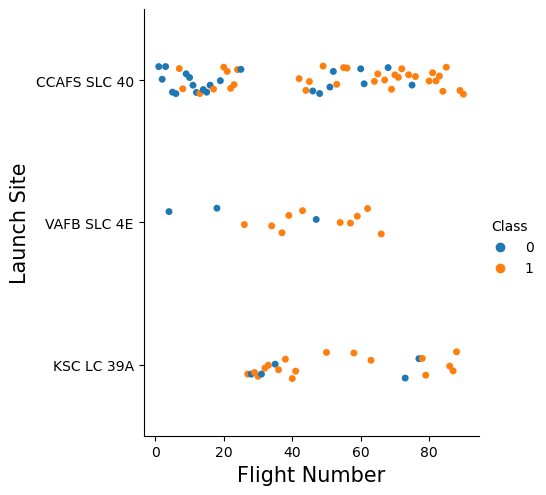

In [75]:
sns.catplot(y="LaunchSite",x="FlightNumber",hue="Class", data=df, aspect = 1)

plt.ylabel("Launch Site",fontsize=15)

plt.xlabel("Flight Number",fontsize=15)

plt.show()

In [77]:
features_one_hot.to_csv('dataset_part\_3.csv', index=False)